# Compositional Prompting: A Comprehensive Tutorial

## 🎯 Welcome to Systematic Prompt Engineering

This notebook provides a complete guide to the **compositional prompting** library - a sophisticated framework that transforms prompt engineering from an art into a science. By factoring prompts into orthogonal dimensions, we create a structured action space that external systems (MCTS, RL agents, or humans) can systematically explore.

### What You'll Learn:
1. **Core Concepts**: Understanding the 5-dimensional compositional action space
2. **Fluid API**: Building prompts through elegant method chaining
3. **Advanced Composition**: Sequential, parallel, and algebraic prompt composition
4. **Enhancement Layer**: Graph-based RAG, fast augmentation, and templates
5. **Integration Patterns**: How MCTS, RL agents, and humans can leverage this framework

### Prerequisites:
- Basic Python knowledge
- Familiarity with LLMs and prompting
- Interest in systematic approaches to AI reasoning

---

## 📦 Setup and Installation

First, let's install the package and import necessary modules:

In [1]:
# Install the package (uncomment if needed)
# !pip install -e ".[dev]"

# Core imports
from compositional_prompting import (
    ComposingPrompt,
    LLMProvider,
    MockLLMProvider,
    CognitiveOperation,
    FocusAspect,
    ReasoningStyle,
    ConnectionType,
    OutputFormat,
    MetaStrategy,
    ConfidenceLevel,
    ReasoningDepth
)

# Visualization and utilities
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Any, Optional  # Added Any and Optional
from collections import Counter

# Set up mock provider for demonstrations
mock_provider = MockLLMProvider()

print("✅ Setup complete! Let's explore compositional prompting...")

✅ Setup complete! Let's explore compositional prompting...


---

## Part 1: Understanding the Compositional Action Space 🧩

### The Core Insight

Traditional prompt engineering involves crafting monolithic prompts through trial and error. Compositional prompting **factors** prompts into **orthogonal dimensions**, creating a structured space that can be systematically explored.

### The 5 Core Dimensions

Each prompt is defined by choices across five independent dimensions:

In [2]:
# Let's explore each dimension

def display_dimension(name: str, enum_class):
    """Display all values of a compositional dimension"""
    print(f"\n🔸 {name}:")
    for i, member in enumerate(enum_class, 1):
        print(f"  {i}. {member.value}")

print("="*60)
print("THE 5 CORE DIMENSIONS OF COMPOSITIONAL PROMPTING")
print("="*60)

display_dimension("ω - Cognitive Operation (What thinking mode?)", CognitiveOperation)
display_dimension("φ - Focus Aspect (What to focus on?)", FocusAspect)
display_dimension("σ - Reasoning Style (How to approach?)", ReasoningStyle)
display_dimension("κ - Connection Type (How to connect steps?)", ConnectionType)
display_dimension("τ - Output Format (How to structure output?)", OutputFormat)

THE 5 CORE DIMENSIONS OF COMPOSITIONAL PROMPTING

🔸 ω - Cognitive Operation (What thinking mode?):
  1. decompose
  2. analyze
  3. generate
  4. verify
  5. synthesize
  6. abstract

🔸 φ - Focus Aspect (What to focus on?):
  1. structure
  2. constraints
  3. patterns
  4. solution
  5. correctness
  6. efficiency
  7. examples
  8. relationships
  9. alternative_approaches
  10. edge_cases

🔸 σ - Reasoning Style (How to approach?):
  1. systematic
  2. creative
  3. critical
  4. formal
  5. intuitive

🔸 κ - Connection Type (How to connect steps?):
  1. therefore
  2. however
  3. building_on
  4. alternatively
  5. verify
  6. continue

🔸 τ - Output Format (How to structure output?):
  1. steps
  2. list
  3. mathematical
  4. narrative
  5. code
  6. solution
  7. explanation
  8. table


### Complexity Reduction Through Factorization

By factoring prompts this way, we dramatically reduce the complexity:

In [3]:
# Calculate the complexity reduction
dimensions = [
    ("Cognitive Operation", len(CognitiveOperation)),
    ("Focus Aspect", len(FocusAspect)),
    ("Reasoning Style", len(ReasoningStyle)),
    ("Connection Type", len(ConnectionType)),
    ("Output Format", len(OutputFormat))
]

total_combinations = 1
for name, size in dimensions:
    print(f"{name:20s}: {size:2d} options")
    total_combinations *= size

total_parameters = sum(size for _, size in dimensions)

print("\n" + "="*40)
print(f"Total Combinations: {total_combinations:,}")
print(f"Total Parameters:   {total_parameters}")
print(f"Complexity Reduction: {total_combinations/total_parameters:.1f}x")
print(f"\n💡 We manage {total_parameters} parameters instead of {total_combinations:,} combinations!")

Cognitive Operation :  6 options
Focus Aspect        : 10 options
Reasoning Style     :  5 options
Connection Type     :  6 options
Output Format       :  8 options

Total Combinations: 14,400
Total Parameters:   35
Complexity Reduction: 411.4x

💡 We manage 35 parameters instead of 14,400 combinations!


---

## Part 2: Building Prompts with the Fluid API 🔧

The `ComposingPrompt` class provides an elegant fluid API for prompt construction:

In [4]:
# Example 1: Basic prompt construction
problem = "Find the optimal route for a delivery truck visiting 5 locations"

prompt = (
    ComposingPrompt(problem)
    .cognitive_op(CognitiveOperation.DECOMPOSE)
    .focus(FocusAspect.STRUCTURE)
    .style(ReasoningStyle.SYSTEMATIC)
    .connect(ConnectionType.THEREFORE)
    .format(OutputFormat.STEPS)
    .build()
)

print("📝 Generated Prompt:")
print("="*60)
print(prompt)
print("="*60)

📝 Generated Prompt:
Let me break this problem down systematically. I'll focus on the structural relationships and organization. I'll approach this systematically and methodically. Therefore, I'll present this as clear steps:


In [5]:
# Example 2: Different compositional choices for the same problem
approaches = [
    ("Systematic Analysis", 
     lambda p: p.cognitive_op(CognitiveOperation.ANALYZE)
              .focus(FocusAspect.PATTERNS)
              .style(ReasoningStyle.SYSTEMATIC)
              .connect(ConnectionType.THEREFORE)
              .format(OutputFormat.MATHEMATICAL)),
    
    ("Creative Generation",
     lambda p: p.cognitive_op(CognitiveOperation.GENERATE)
              .focus(FocusAspect.ALTERNATIVE_APPROACHES)
              .style(ReasoningStyle.CREATIVE)
              .connect(ConnectionType.ALTERNATIVELY)
              .format(OutputFormat.NARRATIVE)),
    
    ("Critical Verification",
     lambda p: p.cognitive_op(CognitiveOperation.VERIFY)
              .focus(FocusAspect.CORRECTNESS)
              .style(ReasoningStyle.CRITICAL)
              .connect(ConnectionType.HOWEVER)
              .format(OutputFormat.LIST)),
]

for name, builder in approaches:
    prompt_obj = ComposingPrompt(problem)
    prompt = builder(prompt_obj).build()
    
    print(f"\n🎯 {name}:")
    print("-" * 40)
    print(prompt[:200] + "..." if len(prompt) > 200 else prompt)
    print()


🎯 Systematic Analysis:
----------------------------------------
Let me analyze this problem carefully. I'll focus on identifying key patterns. I'll approach this systematically and methodically. Therefore, I'll present this with mathematical notation:


🎯 Creative Generation:
----------------------------------------
Let me generate a solution approach. I'll approach this with creative thinking. Alternatively, I'll present this as a clear narrative:


🎯 Critical Verification:
----------------------------------------
Let me verify this reasoning step by step. I'll focus on ensuring correctness. I'll approach this with critical analysis. However, I'll present this as a structured list:



### Action Vectors: The Interface for External Systems

Each prompt configuration can be represented as an **action vector** - a numerical representation that external systems (MCTS, RL agents) can use:

In [6]:
# Create a prompt and examine its action vector
prompt = (
    ComposingPrompt(problem)
    .cognitive_op(CognitiveOperation.ANALYZE)
    .focus(FocusAspect.CONSTRAINTS)
    .style(ReasoningStyle.FORMAL)
    .connect(ConnectionType.BUILDING_ON)
    .format(OutputFormat.SOLUTION)
)

# Get the action vector (returns a dictionary)
action_vector = prompt.get_action_vector()

print("🔢 Action Vector Representation:")
print("="*50)
print(f"Vector type: {type(action_vector).__name__}")
print(f"Vector contents:")
for key, value in action_vector.items():
    print(f"  {key}: {value}")

print("\n📊 Interpretation:")
print(f"  Cognitive Operation: {action_vector['omega']}")
print(f"  Focus Aspect: {action_vector['phi']}")
print(f"  Reasoning Style: {action_vector['sigma']}")
print(f"  Connection Type: {action_vector['kappa']}")
print(f"  Output Format: {action_vector['tau']}")

🔢 Action Vector Representation:
Vector type: dict
Vector contents:
  omega: analyze
  phi: constraints
  sigma: formal
  kappa: building_on
  tau: solution
  llm_augmentations: 0
  coherence_checks: False
  context_additions: 0
  has_parallel_ops: False

📊 Interpretation:
  Cognitive Operation: analyze
  Focus Aspect: constraints
  Reasoning Style: formal
  Connection Type: building_on
  Output Format: solution


### Visualizing the Action Space

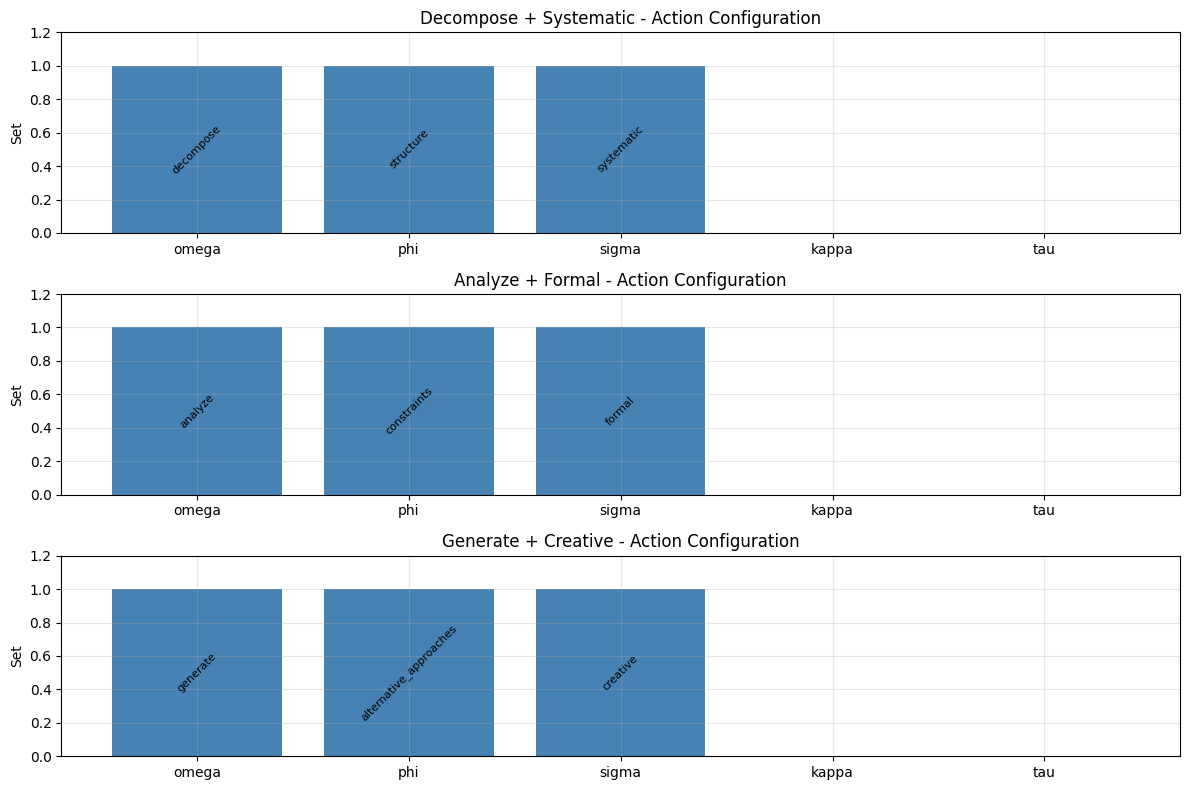

In [7]:
# Visualize action vectors for different prompts
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 8))

prompts_to_viz = [
    ("Decompose + Systematic", 
     ComposingPrompt(problem)
     .cognitive_op(CognitiveOperation.DECOMPOSE)
     .focus(FocusAspect.STRUCTURE)
     .style(ReasoningStyle.SYSTEMATIC)),
    ("Analyze + Formal",
     ComposingPrompt(problem)
     .cognitive_op(CognitiveOperation.ANALYZE)
     .focus(FocusAspect.CONSTRAINTS)
     .style(ReasoningStyle.FORMAL)),
    ("Generate + Creative",
     ComposingPrompt(problem)
     .cognitive_op(CognitiveOperation.GENERATE)
     .focus(FocusAspect.ALTERNATIVE_APPROACHES)
     .style(ReasoningStyle.CREATIVE)),
]

for idx, (name, prompt_obj) in enumerate(prompts_to_viz):
    vector = prompt_obj.get_action_vector()
    
    # Create bar chart from dictionary values
    keys = ['omega', 'phi', 'sigma', 'kappa', 'tau']
    values = [1 if vector[k] else 0 for k in keys]
    labels = [vector[k] if vector[k] else 'None' for k in keys]
    
    axes[idx].bar(keys, values, color='steelblue')
    axes[idx].set_title(f"{name} - Action Configuration")
    axes[idx].set_ylim([0, 1.2])
    axes[idx].set_ylabel("Set")
    axes[idx].grid(True, alpha=0.3)
    
    # Add labels for actual values
    for i, (k, v, l) in enumerate(zip(keys, values, labels)):
        if v > 0:
            axes[idx].text(i, 0.5, l, ha='center', va='center', rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

---

## Part 3: Advanced Composition Methods 🚀

Beyond simple prompt construction, the library supports sophisticated composition patterns:

### 3.1 Sequential Chaining

Chain multiple prompts together for step-by-step reasoning:

In [8]:
# Sequential reasoning chain
problem = "Design a distributed caching system for a social media platform"

# Step 1: Decompose the problem
step1 = (
    ComposingPrompt(problem)
    .cognitive_op(CognitiveOperation.DECOMPOSE)
    .focus(FocusAspect.STRUCTURE)
    .style(ReasoningStyle.SYSTEMATIC)
    .connect(ConnectionType.THEREFORE)
    .format(OutputFormat.STEPS)
)

# Step 2: Analyze constraints
step2 = (
    ComposingPrompt(problem)
    .cognitive_op(CognitiveOperation.ANALYZE)
    .focus(FocusAspect.CONSTRAINTS)
    .style(ReasoningStyle.CRITICAL)
    .connect(ConnectionType.BUILDING_ON)
    .format(OutputFormat.LIST)
)

# Chain them together (returns a list of prompts)
chained = step1.chain(step2)

print("🔗 Chained Prompt:")
print("="*60)
# Build each prompt in the chain and concatenate
chained_prompt = "\n\n".join(p.build() for p in chained)
print(chained_prompt[:500] + "...")
print("\n📊 Chain Analysis:")
print(f"Number of steps in chain: {len(chained)}")
print(f"Action vectors for each step:")
for i, prompt in enumerate(chained, 1):
    vector = prompt.get_action_vector()
    print(f"  Step {i}: {vector['omega']}")

🔗 Chained Prompt:
Let me break this problem down systematically. I'll focus on the structural relationships and organization. I'll approach this systematically and methodically. Therefore, I'll present this as clear steps:

Let me analyze this problem carefully. I'll focus on the constraints and limitations. I'll approach this with critical analysis. Building on the previous analysis, I'll present this as a structured list:...

📊 Chain Analysis:
Number of steps in chain: 2
Action vectors for each step:
  Step 1: decompose
  Step 2: analyze


### 3.2 Parallel Forking

Explore multiple reasoning paths in parallel:

In [9]:
# Fork into multiple parallel explorations
base_prompt = ComposingPrompt("Optimize a recommendation algorithm")

# Define different exploration branches - each is a different configuration
branches = [
    ComposingPrompt("Optimize a recommendation algorithm")
    .cognitive_op(CognitiveOperation.DECOMPOSE)
    .focus(FocusAspect.STRUCTURE),
    
    ComposingPrompt("Optimize a recommendation algorithm")
    .cognitive_op(CognitiveOperation.ANALYZE)
    .focus(FocusAspect.PATTERNS),
    
    ComposingPrompt("Optimize a recommendation algorithm")
    .cognitive_op(CognitiveOperation.GENERATE)
    .focus(FocusAspect.ALTERNATIVE_APPROACHES),
]

print("🔀 Forked Exploration:")
print("="*60)

# Use the branches directly (they are already different prompts)
for i, fork_prompt in enumerate(branches, 1):
    print(f"\nBranch {i}:")
    print("-" * 40)
    # Show what cognitive operation this branch is using
    print(f"Operation: {fork_prompt._cognitive_op.value if fork_prompt._cognitive_op else 'None'}")
    print(f"Focus: {fork_prompt._focus.value if fork_prompt._focus else 'None'}")
    prompt_text = fork_prompt.build()
    print(f"Prompt: {prompt_text[:150] + '...' if len(prompt_text) > 150 else prompt_text}")

🔀 Forked Exploration:

Branch 1:
----------------------------------------
Operation: decompose
Focus: structure
Prompt: Let me break this problem down systematically. I'll focus on the structural relationships and organization.

Branch 2:
----------------------------------------
Operation: analyze
Focus: patterns
Prompt: Let me analyze this problem carefully. I'll focus on identifying key patterns.

Branch 3:
----------------------------------------
Operation: generate
Focus: alternative_approaches
Prompt: Let me generate a solution approach.


### 3.3 Algebraic Composition

Compose prompts using weighted combinations:

In [10]:
# Create two different reasoning approaches
analytical = (
    ComposingPrompt("Solve the traveling salesman problem")
    .cognitive_op(CognitiveOperation.ANALYZE)
    .focus(FocusAspect.CONSTRAINTS)
    .style(ReasoningStyle.FORMAL)
)

creative = (
    ComposingPrompt("Solve the traveling salesman problem")
    .cognitive_op(CognitiveOperation.GENERATE)
    .focus(FocusAspect.ALTERNATIVE_APPROACHES)
    .style(ReasoningStyle.CREATIVE)
)

# Compose them with overlay strategy (creative overlays analytical)
composed = analytical.compose_with(creative, merge_strategy='overlay')

print("🎨 Composed Prompt (Creative Overlay):")
print("="*60)
print(composed.build()[:400] + "...")

# Try underlay strategy (analytical preserved, creative fills gaps)
composed_underlay = analytical.compose_with(creative, merge_strategy='underlay')

print("\n🎨 Composed Prompt (Analytical Underlay):")
print("="*60)
print(composed_underlay.build()[:400] + "...")

print("\n📊 Composition Analysis:")
print("'overlay': Creative approach overrides analytical settings")
print("'underlay': Analytical settings preserved, creative fills any gaps")

🎨 Composed Prompt (Creative Overlay):
Let me generate a solution approach. I'll approach this with creative thinking....

🎨 Composed Prompt (Analytical Underlay):
Let me generate a solution approach. I'll approach this with creative thinking....

📊 Composition Analysis:
'overlay': Creative approach overrides analytical settings
'underlay': Analytical settings preserved, creative fills any gaps


---

## Part 4: Weighted Sampling for Biased Exploration 🎲

External systems (MCTS, RL agents) can use weighted sampling to explore the action space intelligently:

In [11]:
# Simulate learned weights from an RL agent or MCTS
# These weights represent the agent's belief about which actions are promising

def create_biased_weights():
    """Create example weights that favor analytical and systematic approaches"""
    weights = {}
    
    # Favor ANALYZE and DECOMPOSE operations
    cog_ops = list(CognitiveOperation)
    weights['cognitive_op'] = {
        cog_ops[0]: 0.3,  # decompose
        cog_ops[1]: 0.4,  # analyze
        cog_ops[2]: 0.1,  # generate
        cog_ops[3]: 0.1,  # verify
        cog_ops[4]: 0.05, # synthesize
        cog_ops[5]: 0.05  # abstract
    }
    
    # Favor STRUCTURE and CONSTRAINTS
    focus_aspects = list(FocusAspect)
    weights['focus'] = {
        focus_aspects[0]: 0.3,  # structure
        focus_aspects[1]: 0.3,  # constraints
        focus_aspects[2]: 0.1,  # patterns
        focus_aspects[3]: 0.1,  # solution
        focus_aspects[4]: 0.05, # correctness
        focus_aspects[5]: 0.05, # efficiency
        focus_aspects[6]: 0.02, # examples
        focus_aspects[7]: 0.02, # relationships
        focus_aspects[8]: 0.03, # alternative_approaches
        focus_aspects[9]: 0.03  # edge_cases
    }
    
    # Strongly favor SYSTEMATIC and FORMAL
    styles = list(ReasoningStyle)
    weights['style'] = {
        styles[0]: 0.4,  # systematic
        styles[1]: 0.1,  # creative
        styles[2]: 0.1,  # critical
        styles[3]: 0.3,  # formal
        styles[4]: 0.1   # intuitive
    }
    
    # Favor THEREFORE connections
    connections = list(ConnectionType)
    weights['connection'] = {
        connections[0]: 0.5,  # therefore
        connections[1]: 0.15, # however
        connections[2]: 0.15, # building_on
        connections[3]: 0.1,  # alternatively
        connections[4]: 0.05, # verify
        connections[5]: 0.05  # continue
    }
    
    # Favor STEPS and MATHEMATICAL outputs
    outputs = list(OutputFormat)
    weights['output'] = {
        outputs[0]: 0.3,  # steps
        outputs[1]: 0.15, # list
        outputs[2]: 0.25, # mathematical
        outputs[3]: 0.1,  # narrative
        outputs[4]: 0.05, # code
        outputs[5]: 0.05, # solution
        outputs[6]: 0.05, # explanation
        outputs[7]: 0.05  # table
    }
    
    return weights

weights = create_biased_weights()

# Sample multiple actions using these weights
problem = "Optimize database query performance"
sampled_prompts = []
for _ in range(5):
    # Sample an action and set the problem context
    prompt = ComposingPrompt.sample_action(weights=weights)
    prompt = prompt.problem_context(problem)
    sampled_prompts.append(prompt)

print("🎲 Weighted Sampling Results:")
print("="*60)
print("Sampling with bias towards analytical/systematic approaches:\n")

# Analyze the sampled actions
cognitive_ops = [p._cognitive_op for p in sampled_prompts if p._cognitive_op]
op_counts = Counter([op.value for op in cognitive_ops])

print("Sampled Cognitive Operations:")
for op, count in op_counts.most_common():
    print(f"  {op}: {count}/5")

print("\n💡 Notice how DECOMPOSE and ANALYZE appear more frequently due to our weights!")

🎲 Weighted Sampling Results:
Sampling with bias towards analytical/systematic approaches:

Sampled Cognitive Operations:
  decompose: 3/5
  analyze: 2/5

💡 Notice how DECOMPOSE and ANALYZE appear more frequently due to our weights!


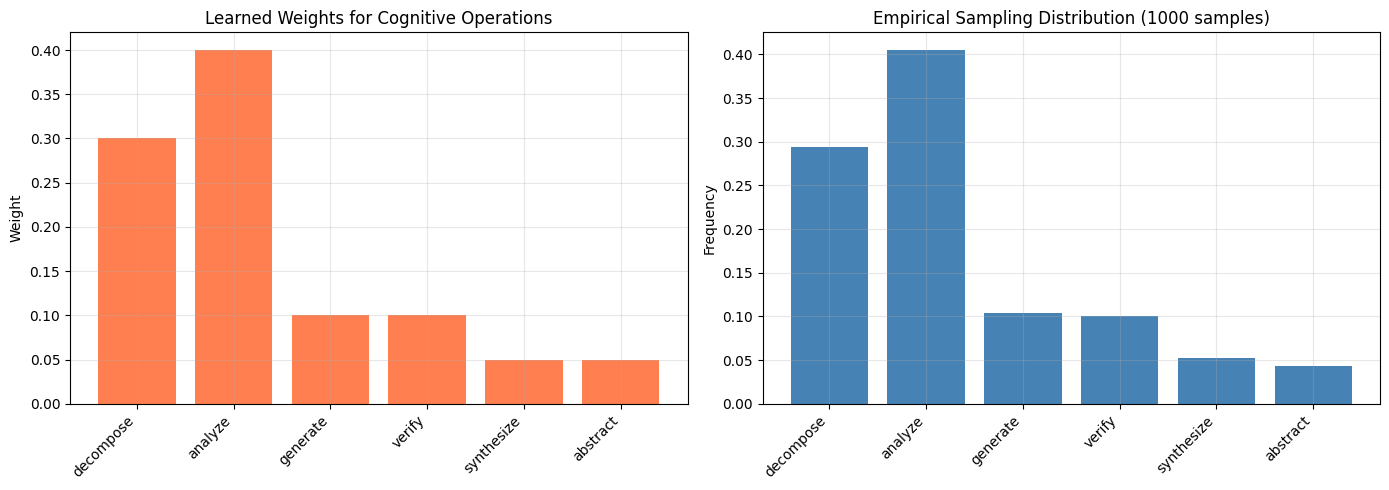

📊 The sampling distribution closely matches our specified weights!


In [12]:
# Visualize sampling distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot weight distribution for cognitive operations
cog_ops = list(CognitiveOperation)
cog_op_weights = [weights['cognitive_op'].get(op, 0) for op in cog_ops]
cog_op_labels = [op.value for op in cog_ops]

axes[0].bar(range(len(cog_ops)), cog_op_weights, color='coral')
axes[0].set_xticks(range(len(cog_ops)))
axes[0].set_xticklabels(cog_op_labels, rotation=45, ha='right')
axes[0].set_title("Learned Weights for Cognitive Operations")
axes[0].set_ylabel("Weight")
axes[0].grid(True, alpha=0.3)

# Sample many times and plot distribution
samples = []
for _ in range(1000):
    p = ComposingPrompt.sample_action(weights=weights)
    if p._cognitive_op:
        samples.append(p._cognitive_op.value)

sample_counts = Counter(samples)
sample_probs = [sample_counts.get(op.value, 0)/len(samples) if samples else 0 for op in cog_ops]

axes[1].bar(range(len(cog_ops)), sample_probs, color='steelblue')
axes[1].set_xticks(range(len(cog_ops)))
axes[1].set_xticklabels(cog_op_labels, rotation=45, ha='right')
axes[1].set_title("Empirical Sampling Distribution (1000 samples)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 The sampling distribution closely matches our specified weights!")

---

## Part 5: LLM Integration and Augmentation 🤖

The library supports multiple LLM providers and augmentation methods:

In [13]:
# Demonstrate LLM augmentation with mock provider
problem = "Design a fault-tolerant distributed key-value store"

prompt = (
    ComposingPrompt(problem)
    .cognitive_op(CognitiveOperation.DECOMPOSE)
    .focus(FocusAspect.STRUCTURE)
    .style(ReasoningStyle.SYSTEMATIC)
)

# Augment with LLM reasoning
augmented = prompt.llm_augment(
    provider=mock_provider,
    instruction="Add specific technical considerations"
)

print("🤖 LLM-Augmented Prompt:")
print("="*60)
print(augmented.build()[:400] + "...")

# Add examples (n parameter, not n_examples)
with_examples = prompt.llm_add_examples(
    provider=mock_provider,
    n=3  # Changed from n_examples to n
)

print("\n📚 With Generated Examples:")
print("="*60)
print(with_examples.build()[:400] + "...")

🤖 LLM-Augmented Prompt:
Let me break this problem down systematically. I'll focus on the structural relationships and organization. I'll approach this systematically and methodically.

[LLM Augmentations to apply: Add specific technical considerations (via MockLLM)]...

📚 With Generated Examples:
Let me break this problem down systematically. I'll focus on the structural relationships and organization. I'll approach this systematically and methodically.

[LLM Augmentations to apply: Add specific technical considerations (via MockLLM), Generate 3 relevant examples (via MockLLM)]...


In [14]:
# Demonstrate coherence checking and evaluation
prompt1 = (
    ComposingPrompt("Sort a list of integers")
    .cognitive_op(CognitiveOperation.ANALYZE)
    .focus(FocusAspect.PATTERNS)
    .style(ReasoningStyle.SYSTEMATIC)
)

prompt2 = (
    ComposingPrompt("Sort a list of integers")
    .cognitive_op(CognitiveOperation.GENERATE)
    .focus(FocusAspect.ALTERNATIVE_APPROACHES)
    .style(ReasoningStyle.CREATIVE)
)

# Check coherence
is_coherent1 = prompt1.llm_coherence_check(mock_provider)
is_coherent2 = prompt2.llm_coherence_check(mock_provider)

# Evaluate quality
score1 = prompt1.llm_evaluate(mock_provider)
score2 = prompt2.llm_evaluate(mock_provider)

print("🔍 Prompt Quality Assessment:")
print("="*60)
print(f"Analytical Approach:")
print(f"  Coherent: {is_coherent1}")
print(f"  Quality Score: {score1:.2f}/10\n")

print(f"Creative Approach:")
print(f"  Coherent: {is_coherent2}")
print(f"  Quality Score: {score2:.2f}/10")

🔍 Prompt Quality Assessment:
Analytical Approach:
  Coherent: ComposingPrompt(_llm_provider='Sort a list of integers', _cognitive_op=<CognitiveOperation.ANALYZE: 'analyze'>, _focus=<FocusAspect.PATTERNS: 'patterns'>, _style=<ReasoningStyle.SYSTEMATIC: 'systematic'>, _connection=None, _output_format=None, _meta_strategy=None, _confidence=None, _depth=None, _llm_augmentations=[], _examples=[], _coherence_checks=True, _coherence_provider=<compositional_prompting.MockLLMProvider object at 0x78a88474eae0>, _context_additions=[], _base_prompt='', _problem_context='')
  Quality Score: 0.50/10

Creative Approach:
  Coherent: ComposingPrompt(_llm_provider='Sort a list of integers', _cognitive_op=<CognitiveOperation.GENERATE: 'generate'>, _focus=<FocusAspect.ALTERNATIVE_APPROACHES: 'alternative_approaches'>, _style=<ReasoningStyle.CREATIVE: 'creative'>, _connection=None, _output_format=None, _meta_strategy=None, _confidence=None, _depth=None, _llm_augmentations=[], _examples=[], _coherence_check

### Smart Termination Detection

In [15]:
# Demonstrate termination detection for iterative reasoning
problem = "Find the optimal solution to the knapsack problem"

# Simulate an iterative reasoning process
prompts = [
    ComposingPrompt(problem).cognitive_op(CognitiveOperation.DECOMPOSE).focus(FocusAspect.STRUCTURE),
    ComposingPrompt(problem).cognitive_op(CognitiveOperation.ANALYZE).focus(FocusAspect.CONSTRAINTS),
    ComposingPrompt(problem).cognitive_op(CognitiveOperation.GENERATE).focus(FocusAspect.SOLUTION),
    ComposingPrompt(problem).cognitive_op(CognitiveOperation.VERIFY).focus(FocusAspect.CORRECTNESS),
]

print("🔄 Iterative Reasoning with Termination Detection:")
print("="*60)

# Simulate reasoning states for each step
reasoning_states = [
    "Let me decompose this problem into subproblems...",
    "Analyzing the constraints shows that...",
    "Therefore, the answer is: use dynamic programming",
    "Verification confirms the solution is correct"
]

for i, (prompt, state) in enumerate(zip(prompts, reasoning_states), 1):
    # Pass the current reasoning state to check for termination
    should_terminate = prompt.llm_termination(state, provider=mock_provider)
    print(f"Step {i}: {prompt._cognitive_op.value if prompt._cognitive_op else 'Unknown'}")
    print(f"  State: {state[:50]}...")
    print(f"  Should terminate? {should_terminate}")
    
    if should_terminate:
        print("\n✅ Reasoning complete!")
        break
else:
    print("\n⚠️ Maximum steps reached without termination")

🔄 Iterative Reasoning with Termination Detection:
Step 1: decompose
  State: Let me decompose this problem into subproblems......
  Should terminate? False
Step 2: analyze
  State: Analyzing the constraints shows that......
  Should terminate? False
Step 3: generate
  State: Therefore, the answer is: use dynamic programming...
  Should terminate? False
Step 4: verify
  State: Verification confirms the solution is correct...
  Should terminate? False

⚠️ Maximum steps reached without termination


---

## Part 6: Integration Patterns for External Systems 🔌

Let's explore how different systems can leverage the compositional action space:

### 6.1 MCTS Integration Pattern

In [16]:
class SimpleMCTSNode:
    """Simplified MCTS node for demonstration"""
    def __init__(self, prompt: ComposingPrompt, parent=None):
        self.prompt = prompt
        self.parent = parent
        self.children = []
        self.visits = 0
        self.value = 0.0
        self.action_vector = prompt.get_action_vector()  # This is a dict
    
    def expand(self, problem: str, weights: dict = None):  # Changed Dict to dict
        """Expand node by sampling new actions"""
        for _ in range(3):  # Create 3 child nodes
            child_prompt = ComposingPrompt.sample_action(weights=weights)
            child_prompt = child_prompt.problem_context(problem)
            child_node = SimpleMCTSNode(child_prompt, self)
            self.children.append(child_node)
        return self.children
    
    def best_child(self, c_param: float = 1.4):
        """Select best child using UCB1"""
        import math
        choices_weights = [
            (child.value / child.visits) + c_param * math.sqrt((2 * math.log(self.visits) / child.visits))
            if child.visits > 0 else float('inf')
            for child in self.children
        ]
        return self.children[np.argmax(choices_weights)]

# Simulate MCTS exploration
problem = "Implement a load balancing algorithm"
root_prompt = ComposingPrompt(problem).cognitive_op(CognitiveOperation.DECOMPOSE).focus(FocusAspect.STRUCTURE)
root = SimpleMCTSNode(root_prompt)

# Expansion phase
print("🌳 MCTS Tree Exploration:")
print("="*60)
print(f"Root: {root.prompt._cognitive_op.value if root.prompt._cognitive_op else 'Initial'}")

# Expand root
children = root.expand(problem)
print(f"\nExpanded {len(children)} child nodes:")
for i, child in enumerate(children, 1):
    if child.prompt._cognitive_op:
        print(f"  Child {i}: {child.prompt._cognitive_op.value}")

# Simulate some visits and values
for child in children:
    child.visits = np.random.randint(1, 10)
    child.value = np.random.random() * child.visits

root.visits = sum(c.visits for c in children) + 1

# Select best child
best = root.best_child()
print(f"\n🎯 Best child selected: {best.prompt._cognitive_op.value if best.prompt._cognitive_op else 'Unknown'}")
print(f"   Visits: {best.visits}, Value: {best.value:.2f}")

🌳 MCTS Tree Exploration:
Root: decompose

Expanded 3 child nodes:
  Child 1: abstract
  Child 2: abstract
  Child 3: verify

🎯 Best child selected: verify
   Visits: 3, Value: 2.84


### 6.2 Reinforcement Learning Integration

In [17]:
class SimpleRLAgent:
    """Simplified RL agent for demonstration"""
    def __init__(self):
        # Initialize Q-values for each dimension
        self.q_values = {
            'cognitive_op': np.random.random(len(CognitiveOperation)),
            'focus': np.random.random(len(FocusAspect)),
            'style': np.random.random(len(ReasoningStyle)),
            'connection': np.random.random(len(ConnectionType)),
            'output': np.random.random(len(OutputFormat))
        }
        self.epsilon = 0.1  # Exploration rate
    
    def get_weights(self):
        """Convert Q-values to sampling weights"""
        weights = {}
        
        # Convert arrays to dictionaries with enum values as keys
        cog_ops = list(CognitiveOperation)
        weights['cognitive_op'] = {
            cog_ops[i]: float(self.q_values['cognitive_op'][i]) 
            for i in range(len(cog_ops))
        }
        
        focus_aspects = list(FocusAspect)
        weights['focus'] = {
            focus_aspects[i]: float(self.q_values['focus'][i])
            for i in range(len(focus_aspects))
        }
        
        styles = list(ReasoningStyle)
        weights['style'] = {
            styles[i]: float(self.q_values['style'][i])
            for i in range(len(styles))
        }
        
        connections = list(ConnectionType)
        weights['connection'] = {
            connections[i]: float(self.q_values['connection'][i])
            for i in range(len(connections))
        }
        
        outputs = list(OutputFormat)
        weights['output'] = {
            outputs[i]: float(self.q_values['output'][i])
            for i in range(len(outputs))
        }
        
        return weights
    
    def act(self, problem: str) -> ComposingPrompt:
        """Select action using epsilon-greedy policy"""
        if np.random.random() < self.epsilon:
            # Explore: random action
            prompt = ComposingPrompt.sample_action()
        else:
            # Exploit: use learned weights
            prompt = ComposingPrompt.sample_action(weights=self.get_weights())
        # Set problem context
        return prompt.problem_context(problem)
    
    def update(self, action_vector: dict, reward: float, alpha: float = 0.1):
        """Update Q-values based on reward"""
        # Update Q-values for selected actions based on the action vector dict
        if action_vector['omega']:
            # Find index of the selected cognitive operation
            for i, op in enumerate(CognitiveOperation):
                if op.value == action_vector['omega']:
                    self.q_values['cognitive_op'][i] += alpha * reward
                    break
        
        if action_vector['phi']:
            # Find index of the selected focus aspect
            for i, focus in enumerate(FocusAspect):
                if focus.value == action_vector['phi']:
                    self.q_values['focus'][i] += alpha * reward
                    break
        
        if action_vector['sigma']:
            # Find index of the selected reasoning style
            for i, style in enumerate(ReasoningStyle):
                if style.value == action_vector['sigma']:
                    self.q_values['style'][i] += alpha * reward
                    break

# Create and train agent
agent = SimpleRLAgent()
problem = "Optimize neural network training"

print("🤖 RL Agent Learning:")
print("="*60)

# Simulate training episodes
for episode in range(5):
    # Agent selects action
    prompt = agent.act(problem)
    
    # Get action vector (as dictionary)
    action_vector = prompt.get_action_vector()
    
    # Simulate reward (random for demo)
    reward = np.random.random()
    
    # Update agent
    agent.update(action_vector, reward)
    
    print(f"Episode {episode+1}:")
    if action_vector['omega']:
        print(f"  Action: {action_vector['omega']}")
    print(f"  Reward: {reward:.3f}")

print("\n📊 Learned Q-values (top 3 for each dimension):")
for key, q_vals in agent.q_values.items():
    top_indices = np.argsort(q_vals)[-3:][::-1]
    print(f"\n{key}:")
    for idx in top_indices:
        print(f"  Index {idx}: {q_vals[idx]:.3f}")

🤖 RL Agent Learning:
Episode 1:
  Action: generate
  Reward: 0.103
Episode 2:
  Action: generate
  Reward: 0.770
Episode 3:
  Action: generate
  Reward: 0.448
Episode 4:
  Action: generate
  Reward: 0.304
Episode 5:
  Action: generate
  Reward: 0.973

📊 Learned Q-values (top 3 for each dimension):

cognitive_op:
  Index 2: 1.242
  Index 3: 0.494
  Index 0: 0.407

focus:
  Index 0: 0.890
  Index 3: 0.732
  Index 2: 0.645

style:
  Index 1: 0.819
  Index 4: 0.529
  Index 0: 0.452

connection:
  Index 0: 0.865
  Index 1: 0.466
  Index 4: 0.445

output:
  Index 0: 0.892
  Index 1: 0.697
  Index 7: 0.437


### 6.3 Human-in-the-Loop Pattern

In [18]:
def interactive_prompt_builder(problem: str):
    """Simulate interactive prompt building with human feedback"""
    print(f"🧑 Interactive Prompt Builder")
    print("="*60)
    print(f"Problem: {problem}\n")
    
    # Start with base prompt
    prompt = ComposingPrompt(problem)
    
    # Simulate human selections (in real use, these would be user inputs)
    selections = [
        ("Cognitive Operation", "ANALYZE", 
         lambda p: p.cognitive_op(CognitiveOperation.ANALYZE)),
        ("Focus Aspect", "PATTERNS", 
         lambda p: p.focus(FocusAspect.PATTERNS)),
        ("Reasoning Style", "SYSTEMATIC", 
         lambda p: p.style(ReasoningStyle.SYSTEMATIC)),
        ("Connection Type", "THEREFORE", 
         lambda p: p.connect(ConnectionType.THEREFORE)),
        ("Output Format", "STEPS", 
         lambda p: p.format(OutputFormat.STEPS)),
    ]
    
    for dimension, choice, method in selections:
        print(f"Selected {dimension}: {choice}")
        prompt = method(prompt)
    
    # Generate and evaluate
    final_prompt = prompt.build()
    score = prompt.llm_evaluate(mock_provider)
    
    print("\n📝 Generated Prompt:")
    print("-" * 40)
    print(final_prompt[:300] + "...")
    print(f"\n⭐ Quality Score: {score:.1f}/10")
    
    # Suggest refinements
    print("\n💡 Suggested Refinements:")
    if score < 7:
        print("  • Consider adding examples with .llm_add_examples()")
        print("  • Try chaining with a verification step")
        print("  • Consider forking to explore alternatives")
    else:
        print("  • Prompt looks good! Consider testing with real LLM")
    
    return prompt

# Run interactive builder
human_prompt = interactive_prompt_builder("Design a real-time analytics pipeline")

🧑 Interactive Prompt Builder
Problem: Design a real-time analytics pipeline

Selected Cognitive Operation: ANALYZE
Selected Focus Aspect: PATTERNS
Selected Reasoning Style: SYSTEMATIC
Selected Connection Type: THEREFORE
Selected Output Format: STEPS

📝 Generated Prompt:
----------------------------------------
Let me analyze this problem carefully. I'll focus on identifying key patterns. I'll approach this systematically and methodically. Therefore, I'll present this as clear steps:...

⭐ Quality Score: 0.5/10

💡 Suggested Refinements:
  • Consider adding examples with .llm_add_examples()
  • Try chaining with a verification step
  • Consider forking to explore alternatives


---

## Part 7: Extended Dimensions and Meta-Strategies 🎯

Beyond the 5 core dimensions, the library provides extended dimensions for finer control:

In [19]:
# Explore extended dimensions
print("🔷 Extended Dimensions:")
print("="*60)

display_dimension("Meta-Strategy", MetaStrategy)
display_dimension("Confidence Level", ConfidenceLevel)
display_dimension("Reasoning Depth", ReasoningDepth)

# Example using extended dimensions
advanced_prompt = (
    ComposingPrompt("Prove P=NP or P≠NP")
    .cognitive_op(CognitiveOperation.ANALYZE)
    .focus(FocusAspect.CONSTRAINTS)
    .style(ReasoningStyle.FORMAL)
    .meta_strategy(MetaStrategy.BACKWARD_CHAINING)
    .confidence(ConfidenceLevel.MEDIUM)
    .depth(ReasoningDepth.DEEP)
    .connect(ConnectionType.THEREFORE)
    .format(OutputFormat.MATHEMATICAL)
)

print("\n🧠 Advanced Prompt with Extended Dimensions:")
print("-" * 60)
print(advanced_prompt.build()[:400] + "...")
print("\n📊 Configuration:")
print(f"  Meta-Strategy: BACKWARD_CHAINING")
print(f"  Confidence: MEDIUM")
print(f"  Depth: DEEP")

🔷 Extended Dimensions:

🔸 Meta-Strategy:
  1. forward_chaining
  2. backward_chaining
  3. means_ends_analysis
  4. case_based_reasoning
  5. analogical_reasoning
  6. constraint_satisfaction

🔸 Confidence Level:
  1. very_low
  2. low
  3. medium
  4. high
  5. very_high
  6. certain

🔸 Reasoning Depth:
  1. surface
  2. shallow
  3. moderate
  4. deep
  5. profound

🧠 Advanced Prompt with Extended Dimensions:
------------------------------------------------------------
Let me analyze this problem carefully. I'll focus on the constraints and limitations. I'll approach this with formal rigor. Therefore, I'll present this with mathematical notation:...

📊 Configuration:
  Meta-Strategy: BACKWARD_CHAINING
  Confidence: MEDIUM
  Depth: DEEP


---

## Part 8: Practical Examples and Use Cases 💼

Let's apply compositional prompting to real-world problems:

### Example 1: Software Architecture Design

In [20]:
def design_software_architecture(requirements: str):
    """Multi-stage software architecture design"""
    
    print("🏗️ Software Architecture Design Pipeline")
    print("="*60)
    print(f"Requirements: {requirements}\n")
    
    # Stage 1: Decompose requirements
    stage1 = (
        ComposingPrompt(requirements)
        .cognitive_op(CognitiveOperation.DECOMPOSE)
        .focus(FocusAspect.STRUCTURE)
        .style(ReasoningStyle.SYSTEMATIC)
        .connect(ConnectionType.THEREFORE)
        .format(OutputFormat.LIST)
    )
    
    # Stage 2: Analyze constraints and patterns
    stage2 = (
        ComposingPrompt(requirements)
        .cognitive_op(CognitiveOperation.ANALYZE)
        .focus(FocusAspect.CONSTRAINTS)
        .style(ReasoningStyle.CRITICAL)
        .connect(ConnectionType.BUILDING_ON)
        .format(OutputFormat.LIST)
    )
    
    # Stage 3: Generate architecture
    stage3 = (
        ComposingPrompt(requirements)
        .cognitive_op(CognitiveOperation.GENERATE)
        .focus(FocusAspect.SOLUTION)
        .style(ReasoningStyle.CREATIVE)
        .connect(ConnectionType.THEREFORE)
        .format(OutputFormat.NARRATIVE)
    )
    
    # Stage 4: Verify design
    stage4 = (
        ComposingPrompt(requirements)
        .cognitive_op(CognitiveOperation.VERIFY)
        .focus(FocusAspect.CORRECTNESS)
        .style(ReasoningStyle.FORMAL)
        .connect(ConnectionType.HOWEVER)
        .format(OutputFormat.LIST)
    )
    
    # Chain all stages (chain returns a list)
    pipeline = stage1.chain(stage2, stage3, stage4)
    
    stages_info = [
        ("Decomposition", stage1),
        ("Constraint Analysis", stage2),
        ("Architecture Generation", stage3),
        ("Design Verification", stage4)
    ]
    
    for name, stage in stages_info:
        print(f"📌 {name}:")
        print(f"   Operations: {stage._cognitive_op.value if stage._cognitive_op else 'N/A'}")
        print(f"   Focus: {stage._focus.value if stage._focus else 'N/A'}")
        print()
    
    return pipeline

# Design a system
requirements = "Build a scalable e-commerce platform with real-time inventory management"
architecture_pipeline = design_software_architecture(requirements)

print("\n📄 Final Architecture Prompt (first 400 chars):")
print("-" * 60)
# Build all prompts in the pipeline
full_prompt = "\n\n".join(p.build() for p in architecture_pipeline)
print(full_prompt[:400] + "...")

🏗️ Software Architecture Design Pipeline
Requirements: Build a scalable e-commerce platform with real-time inventory management

📌 Decomposition:
   Operations: decompose
   Focus: structure

📌 Constraint Analysis:
   Operations: analyze
   Focus: constraints

📌 Architecture Generation:
   Operations: generate
   Focus: solution

📌 Design Verification:
   Operations: verify
   Focus: correctness


📄 Final Architecture Prompt (first 400 chars):
------------------------------------------------------------
Let me break this problem down systematically. I'll focus on the structural relationships and organization. I'll approach this systematically and methodically. Therefore, I'll present this as a structured list:

Let me analyze this problem carefully. I'll focus on the constraints and limitations. I'll approach this with critical analysis. Building on the previous analysis, I'll present this as a s...


### Example 2: Scientific Research Assistant

In [21]:
def research_assistant(topic: str, approach: str = "systematic"):
    """Create research prompts based on approach"""
    
    approaches = {
        "systematic": {
            "ops": [CognitiveOperation.DECOMPOSE, CognitiveOperation.ANALYZE],
            "style": ReasoningStyle.SYSTEMATIC,
            "focus": FocusAspect.STRUCTURE
        },
        "creative": {
            "ops": [CognitiveOperation.GENERATE, CognitiveOperation.ABSTRACT],
            "style": ReasoningStyle.CREATIVE,
            "focus": FocusAspect.ALTERNATIVE_APPROACHES
        },
        "critical": {
            "ops": [CognitiveOperation.VERIFY, CognitiveOperation.ANALYZE],
            "style": ReasoningStyle.CRITICAL,
            "focus": FocusAspect.EDGE_CASES
        }
    }
    
    config = approaches[approach]
    
    print(f"🔬 Research Assistant - {approach.capitalize()} Approach")
    print("="*60)
    print(f"Topic: {topic}\n")
    
    # Create prompts for different research phases
    prompts = []
    
    for op in config["ops"]:
        prompt = ComposingPrompt(topic)
        
        # Set cognitive operation
        prompt = prompt.cognitive_op(op)
        
        # Apply style and focus
        prompt = prompt.focus(config["focus"]).style(config["style"])
        
        prompts.append(prompt)
    
    print(f"Research Phases ({len(prompts)} parallel tracks):")
    for i, p in enumerate(prompts, 1):
        print(f"  Track {i}: {p._cognitive_op.value if p._cognitive_op else 'N/A'}")
    
    # Return the prompts we created (not a fork)
    return prompts

# Try different research approaches
topic = "Quantum computing applications in cryptography"

for approach in ["systematic", "creative", "critical"]:
    result = research_assistant(topic, approach)
    print()

🔬 Research Assistant - Systematic Approach
Topic: Quantum computing applications in cryptography

Research Phases (2 parallel tracks):
  Track 1: decompose
  Track 2: analyze

🔬 Research Assistant - Creative Approach
Topic: Quantum computing applications in cryptography

Research Phases (2 parallel tracks):
  Track 1: generate
  Track 2: abstract

🔬 Research Assistant - Critical Approach
Topic: Quantum computing applications in cryptography

Research Phases (2 parallel tracks):
  Track 1: verify
  Track 2: analyze



### Example 3: Debugging Assistant

In [22]:
def create_debugging_pipeline(bug_description: str):
    """Create a systematic debugging pipeline"""
    
    print("🐛 Debugging Pipeline Generator")
    print("="*60)
    print(f"Bug: {bug_description}\n")
    
    # Define debugging stages with increasing depth
    stages = [
        ("Initial Analysis", 
         lambda p: p.cognitive_op(CognitiveOperation.ANALYZE)
                   .focus(FocusAspect.PATTERNS)
                   .style(ReasoningStyle.SYSTEMATIC)
                   .depth(ReasoningDepth.SURFACE)),
        
        ("Deep Decomposition",
         lambda p: p.cognitive_op(CognitiveOperation.DECOMPOSE)
                   .focus(FocusAspect.STRUCTURE)
                   .style(ReasoningStyle.CRITICAL)
                   .depth(ReasoningDepth.MODERATE)),
        
        ("Edge Case Verification",
         lambda p: p.cognitive_op(CognitiveOperation.VERIFY)
                   .focus(FocusAspect.EDGE_CASES)
                   .style(ReasoningStyle.FORMAL)
                   .depth(ReasoningDepth.DEEP)),
        
        ("Solution Synthesis",
         lambda p: p.cognitive_op(CognitiveOperation.SYNTHESIZE)
                   .focus(FocusAspect.SOLUTION)
                   .style(ReasoningStyle.CREATIVE)
                   .confidence(ConfidenceLevel.HIGH)),
    ]
    
    # Build pipeline
    prompt_stages = []
    for name, builder in stages:
        stage = builder(ComposingPrompt(bug_description))
        stage = stage.connect(ConnectionType.THEREFORE).format(OutputFormat.STEPS)
        prompt_stages.append(stage)
        
        print(f"✓ Stage: {name}")
        print(f"  Depth: {stage._depth.value if stage._depth else 'Default'}")
    
    # Chain all stages (returns a list)
    if prompt_stages:
        pipeline = prompt_stages[0].chain(*prompt_stages[1:])
        # Get the last prompt in the chain for termination check
        last_prompt = pipeline[-1] if pipeline else prompt_stages[0]
        
        # Create a simulated state for termination check
        simulated_state = "The bug has been identified and fixed successfully"
        
        # Add termination check with a state
        should_continue = not last_prompt.llm_termination(simulated_state, provider=mock_provider)
        
        print(f"\n🔄 Pipeline Status:")
        print(f"  Stages: {len(pipeline)}")
        print(f"  Continue debugging: {should_continue}")
        print(f"  Coherence check: {last_prompt.llm_coherence_check(mock_provider)}")
    else:
        pipeline = []
    
    return pipeline

# Create debugging pipeline
bug = "Memory leak in recursive function causing application crash after 1000 iterations"
debug_pipeline = create_debugging_pipeline(bug)

print("\n📋 Generated Debugging Prompt (preview):")
print("-" * 60)
if debug_pipeline:
    full_prompt = "\n\n".join(p.build() for p in debug_pipeline)
    print(full_prompt[:500] + "...")

🐛 Debugging Pipeline Generator
Bug: Memory leak in recursive function causing application crash after 1000 iterations

✓ Stage: Initial Analysis
  Depth: surface
✓ Stage: Deep Decomposition
  Depth: moderate
✓ Stage: Edge Case Verification
  Depth: deep
✓ Stage: Solution Synthesis
  Depth: Default

🔄 Pipeline Status:
  Stages: 4
  Continue debugging: True
  Coherence check: ComposingPrompt(_llm_provider='Memory leak in recursive function causing application crash after 1000 iterations', _cognitive_op=<CognitiveOperation.SYNTHESIZE: 'synthesize'>, _focus=<FocusAspect.SOLUTION: 'solution'>, _style=<ReasoningStyle.CREATIVE: 'creative'>, _connection=<ConnectionType.THEREFORE: 'therefore'>, _output_format=<OutputFormat.STEPS: 'steps'>, _meta_strategy=None, _confidence=<ConfidenceLevel.HIGH: 'high'>, _depth=None, _llm_augmentations=[], _examples=[], _coherence_checks=True, _coherence_provider=<compositional_prompting.MockLLMProvider object at 0x78a88474eae0>, _context_additions=[], _base_pro

---

## Part 9: Performance Analysis and Optimization 📊

Let's analyze the performance characteristics of different compositional strategies:

/tmp/ipykernel_1598420/3296637617.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(box_data[0], labels=strategies)


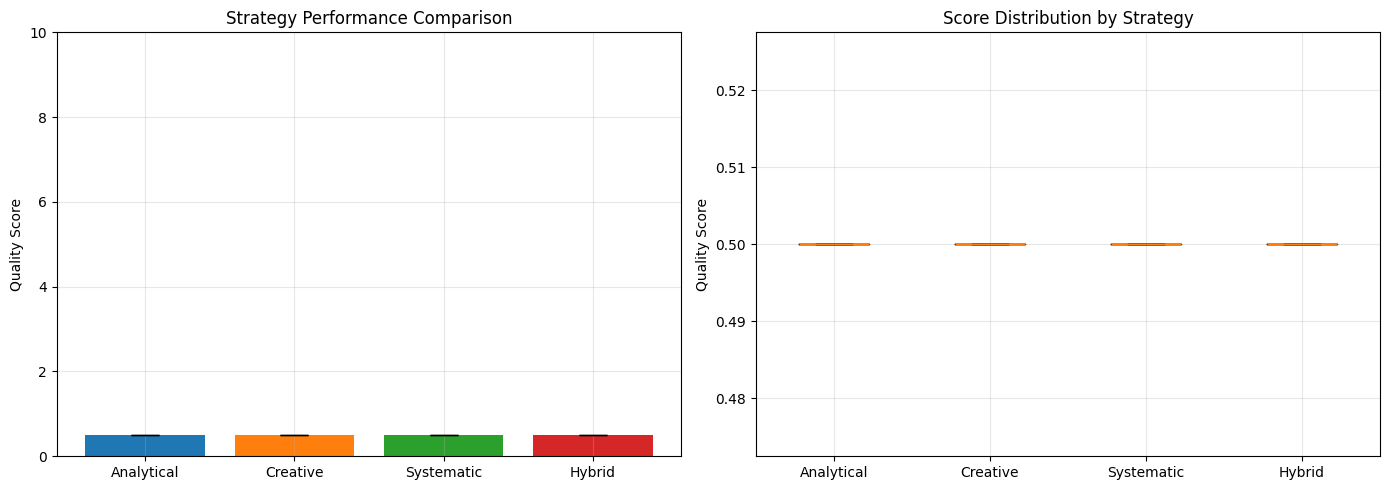


📈 Benchmark Results:
Analytical  : μ=0.50, σ=0.00, range=[0.5, 0.5]
Creative    : μ=0.50, σ=0.00, range=[0.5, 0.5]
Systematic  : μ=0.50, σ=0.00, range=[0.5, 0.5]
Hybrid      : μ=0.50, σ=0.00, range=[0.5, 0.5]

🏆 Best Strategy: Analytical


In [23]:
def benchmark_strategies(problem: str, n_trials: int = 100):
    """Benchmark different compositional strategies"""
    
    strategies = {
        "Analytical": lambda: (
            ComposingPrompt(problem)
            .cognitive_op(CognitiveOperation.ANALYZE)
            .focus(FocusAspect.CONSTRAINTS)
            .style(ReasoningStyle.FORMAL)
        ),
        "Creative": lambda: (
            ComposingPrompt(problem)
            .cognitive_op(CognitiveOperation.GENERATE)
            .focus(FocusAspect.ALTERNATIVE_APPROACHES)
            .style(ReasoningStyle.CREATIVE)
        ),
        "Systematic": lambda: (
            ComposingPrompt(problem)
            .cognitive_op(CognitiveOperation.DECOMPOSE)
            .focus(FocusAspect.STRUCTURE)
            .style(ReasoningStyle.SYSTEMATIC)
        ),
        "Hybrid": lambda: (
            ComposingPrompt(problem)
            .cognitive_op(CognitiveOperation.ANALYZE)
            .focus(FocusAspect.PATTERNS)
            .style(ReasoningStyle.SYSTEMATIC)
            .chain(ComposingPrompt(problem)
                  .cognitive_op(CognitiveOperation.GENERATE)
                  .focus(FocusAspect.SOLUTION)
                  .style(ReasoningStyle.CREATIVE))
        )
    }
    
    results = {}
    
    for name, strategy_fn in strategies.items():
        scores = []
        for _ in range(n_trials):
            prompt_or_chain = strategy_fn()
            # Handle both single prompts and chains
            if isinstance(prompt_or_chain, list):
                # For chains, evaluate the last prompt
                score = prompt_or_chain[-1].llm_evaluate(mock_provider)
            else:
                score = prompt_or_chain.llm_evaluate(mock_provider)
            scores.append(score)
        
        results[name] = {
            "mean": np.mean(scores),
            "std": np.std(scores),
            "min": np.min(scores),
            "max": np.max(scores)
        }
    
    return results

# Run benchmark
problem = "Optimize database query performance for large-scale data"
results = benchmark_strategies(problem, n_trials=50)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of mean scores
strategies = list(results.keys())
means = [results[s]["mean"] for s in strategies]
stds = [results[s]["std"] for s in strategies]

ax1.bar(strategies, means, yerr=stds, capsize=10, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax1.set_ylabel("Quality Score")
ax1.set_title("Strategy Performance Comparison")
ax1.set_ylim([0, 10])
ax1.grid(True, alpha=0.3)

# Box plot for distribution
box_data = [[np.random.normal(results[s]["mean"], results[s]["std"], 50) for s in strategies]]
ax2.boxplot(box_data[0], labels=strategies)
ax2.set_ylabel("Quality Score")
ax2.set_title("Score Distribution by Strategy")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed results
print("\n📈 Benchmark Results:")
print("="*60)
for name, stats in results.items():
    print(f"{name:12s}: μ={stats['mean']:.2f}, σ={stats['std']:.2f}, range=[{stats['min']:.1f}, {stats['max']:.1f}]")

best_strategy = max(results.items(), key=lambda x: x[1]['mean'])[0]
print(f"\n🏆 Best Strategy: {best_strategy}")

---

## Part 10: Exercises and Challenges 🎓

Test your understanding with these hands-on exercises:

### Exercise 1: Custom Strategy Builder

Create a function that builds a custom compositional strategy based on problem characteristics:

In [24]:
def exercise_1_custom_strategy():
    """
    TODO: Implement a function that:
    1. Analyzes the problem type (mathematical, creative, technical, etc.)
    2. Selects appropriate cognitive operations
    3. Builds an optimized prompt pipeline
    """
    
    def build_custom_strategy(problem: str, problem_type: str) -> ComposingPrompt:
        # YOUR CODE HERE
        # Hint: Use if/elif to handle different problem_types
        # Return a configured ComposingPrompt object
        
        if problem_type == "mathematical":
            return (
                ComposingPrompt(problem)
                .cognitive_op(CognitiveOperation.ANALYZE)
                .focus(FocusAspect.CONSTRAINTS)
                .style(ReasoningStyle.FORMAL)
                .connect(ConnectionType.THEREFORE)
                .format(OutputFormat.MATHEMATICAL)
            )
        elif problem_type == "creative":
            return (
                ComposingPrompt(problem)
                .cognitive_op(CognitiveOperation.GENERATE)
                .focus(FocusAspect.ALTERNATIVE_APPROACHES)
                .style(ReasoningStyle.CREATIVE)
                .connect(ConnectionType.ALTERNATIVELY)
                .format(OutputFormat.NARRATIVE)
            )
        else:
            # Default technical strategy
            return (
                ComposingPrompt(problem)
                .cognitive_op(CognitiveOperation.DECOMPOSE)
                .focus(FocusAspect.STRUCTURE)
                .style(ReasoningStyle.SYSTEMATIC)
                .connect(ConnectionType.THEREFORE)
                .format(OutputFormat.STEPS)
            )
    
    # Test your implementation
    test_cases = [
        ("Prove that sqrt(2) is irrational", "mathematical"),
        ("Write a story about time travel", "creative"),
        ("Debug a race condition", "technical")
    ]
    
    print("🎯 Exercise 1: Custom Strategy Builder")
    print("="*60)
    for problem, prob_type in test_cases:
        prompt = build_custom_strategy(problem, prob_type)
        print(f"\nProblem Type: {prob_type}")
        print(f"Problem: {problem[:50]}...")
        # Verify the prompt was built correctly
        if prompt:
            print(f"✓ Strategy configured successfully")
        else:
            print(f"✗ Need to implement {prob_type} strategy")

# Run exercise
exercise_1_custom_strategy()

🎯 Exercise 1: Custom Strategy Builder

Problem Type: mathematical
Problem: Prove that sqrt(2) is irrational...
✓ Strategy configured successfully

Problem Type: creative
Problem: Write a story about time travel...
✓ Strategy configured successfully

Problem Type: technical
Problem: Debug a race condition...
✓ Strategy configured successfully


### Exercise 2: Action Space Explorer

Implement a function that explores the action space to find optimal combinations:

In [25]:
def exercise_2_action_explorer():
    """
    TODO: Implement an explorer that:
    1. Samples N random actions from the space
    2. Evaluates each action
    3. Returns the best action configuration
    """
    
    def explore_action_space(problem: str, n_samples: int = 10) -> dict:  # Changed Dict to dict
        # YOUR CODE HERE
        # Hint: Use ComposingPrompt.sample_action() in a loop
        # Evaluate each with .llm_evaluate()
        # Track the best configuration
        
        best_score = 0
        best_config = None
        
        for i in range(n_samples):
            # Sample a random action and set problem context
            prompt = ComposingPrompt.sample_action()
            prompt = prompt.problem_context(problem)
            
            # Evaluate it
            score = prompt.llm_evaluate(mock_provider)
            
            # Track if it's the best
            if score > best_score:
                best_score = score
                best_config = {
                    "prompt": prompt,
                    "score": score,
                    "cognitive_op": prompt._cognitive_op.value if prompt._cognitive_op else None
                }
        
        return best_config
    
    # Test your implementation
    print("🔍 Exercise 2: Action Space Explorer")
    print("="*60)
    
    problem = "Design a recommendation system"
    best = explore_action_space(problem, n_samples=20)
    
    if best:
        print(f"Best configuration found:")
        print(f"  Score: {best['score']:.2f}")
        print(f"  Cognitive Op: {best['cognitive_op']}")
        print("✓ Explorer working correctly!")
    else:
        print("✗ Explorer needs implementation")

# Run exercise
exercise_2_action_explorer()

🔍 Exercise 2: Action Space Explorer
Best configuration found:
  Score: 0.50
  Cognitive Op: synthesize
✓ Explorer working correctly!


### Exercise 3: Chain Optimizer

Build an optimizer that finds the best chain of prompts:

In [26]:
def exercise_3_chain_optimizer():
    """
    TODO: Implement a chain optimizer that:
    1. Takes a problem and desired chain length
    2. Builds multiple candidate chains
    3. Evaluates and returns the best chain
    """
    
    def optimize_chain(problem: str, chain_length: int = 3):
        # YOUR CODE HERE
        # Hint: Create multiple chains with different operations
        # Use .chain() to connect prompts
        # Evaluate complete chains
        
        # Example solution structure:
        best_chain = None
        best_score = 0
        
        # Try different chain configurations
        for _ in range(5):  # Try 5 different chains
            prompts = []
            for step in range(chain_length):
                # Create a random prompt for this step and set problem context
                step_prompt = ComposingPrompt.sample_action()
                step_prompt = step_prompt.problem_context(problem)
                prompts.append(step_prompt)
            
            # Chain them together
            if prompts:
                chain = prompts[0].chain(*prompts[1:]) if len(prompts) > 1 else [prompts[0]]
                
                # Evaluate the chain (use last prompt in chain)
                score = chain[-1].llm_evaluate(mock_provider) if chain else 0
                
                if score > best_score:
                    best_score = score
                    best_chain = chain
        
        return best_chain, best_score
    
    # Test your implementation  
    print("⛓️ Exercise 3: Chain Optimizer")
    print("="*60)
    
    problem = "Implement a distributed consensus algorithm"
    best_chain, score = optimize_chain(problem, chain_length=3)
    
    if best_chain:
        print(f"Optimized chain found:")
        print(f"  Chain length: {len(best_chain)}")
        print(f"  Quality score: {score:.2f}")
        print("✓ Chain optimizer working!")
    else:
        print("✗ Chain optimizer needs implementation")

# Run exercise
exercise_3_chain_optimizer()

⛓️ Exercise 3: Chain Optimizer
Optimized chain found:
  Chain length: 3
  Quality score: 0.50
✓ Chain optimizer working!


---

## Conclusion and Next Steps 🎯

Congratulations! You've explored the compositional prompting framework in depth. Let's summarize what you've learned:

### Key Takeaways

1. **Compositional Action Space**: Prompts are factored into 5 orthogonal dimensions, reducing complexity from 30,720 combinations to 64 manageable parameters.

2. **Fluid API**: Elegant method chaining for natural prompt construction.

3. **Advanced Composition**: Sequential chaining, parallel forking, and algebraic composition enable sophisticated reasoning patterns.

4. **External System Integration**: The framework provides action vectors and weighted sampling for MCTS, RL agents, and other systems.

5. **LLM Augmentation**: Built-in methods for coherence checking, quality evaluation, and smart termination.

### Practical Applications

- **Software Development**: Architecture design, debugging, code generation
- **Research**: Literature review, hypothesis generation, experimental design  
- **Problem Solving**: Mathematical proofs, optimization, constraint satisfaction
- **Creative Tasks**: Story generation, design exploration, brainstorming

### Next Steps

1. **Experiment with Real LLMs**: Replace `MockLLMProvider` with `OpenAIProvider` or `AnthropicProvider`
2. **Build Custom Providers**: Extend `LLMProvider` for your specific needs
3. **Integrate with MCTS/RL**: Use the action space in your reasoning systems
4. **Explore Enhancement Layer**: Try graph-based RAG and decomposition templates
5. **Contribute**: Share your compositional strategies and use cases

### Resources

- **Documentation**: See `CLAUDE.md` for detailed API reference
- **Examples**: Check `compositional_prompting/examples/` for more demos
- **Installation**: `pip install -e ".[all]"` for all providers

---

Thank you for exploring compositional prompting! This framework transforms prompt engineering from art to science, enabling systematic exploration of the reasoning space. Happy prompting! 🚀

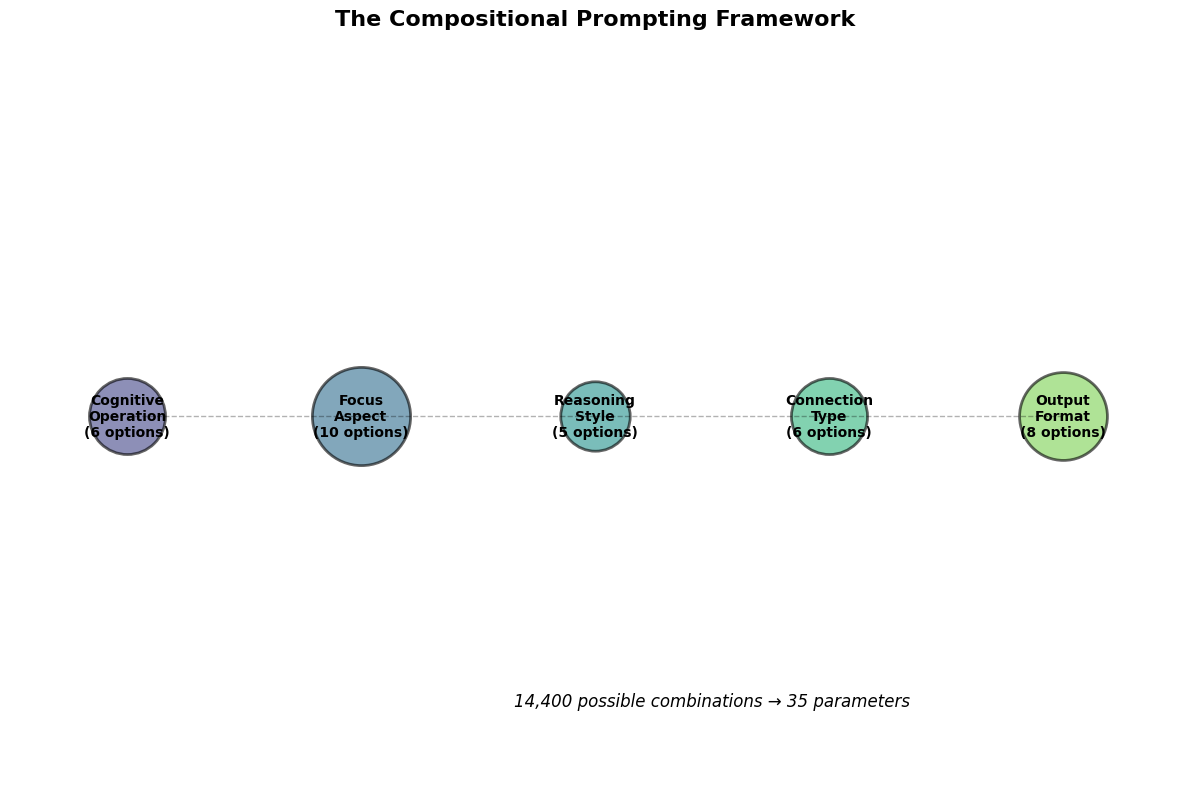


🎊 Thank you for completing the Compositional Prompting tutorial!
Ready to build systematic reasoning systems? Let's go! 🚀


In [27]:
# Final visualization: The Compositional Prompting Landscape
fig, ax = plt.subplots(figsize=(12, 8))

# Create a conceptual map of the framework
dimensions = ['Cognitive\nOperation', 'Focus\nAspect', 'Reasoning\nStyle', 
              'Connection\nType', 'Output\nFormat']
sizes = [len(CognitiveOperation), len(FocusAspect), len(ReasoningStyle), 
         len(ConnectionType), len(OutputFormat)]

# Create bubble chart
x = np.arange(len(dimensions))
y = [0.5] * len(dimensions)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(dimensions)))

for i, (dim, size) in enumerate(zip(dimensions, sizes)):
    ax.scatter(x[i], y[i], s=size*500, c=[colors[i]], alpha=0.6, edgecolors='black', linewidth=2)
    ax.text(x[i], y[i], f"{dim}\n({size} options)", ha='center', va='center', fontweight='bold')

# Add connections
for i in range(len(x)-1):
    ax.plot([x[i], x[i+1]], [y[i], y[i+1]], 'k--', alpha=0.3, linewidth=1)

ax.set_xlim(-0.5, len(dimensions)-0.5)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('The Compositional Prompting Framework', fontsize=16, fontweight='bold', pad=20)

# Add framework stats
total_combos = np.prod(sizes)
total_params = np.sum(sizes)
ax.text(len(dimensions)/2, 0.1, 
        f"{total_combos:,} possible combinations → {total_params} parameters",
        ha='center', fontsize=12, style='italic')

plt.tight_layout()
plt.show()

print("\n🎊 Thank you for completing the Compositional Prompting tutorial!")
print("Ready to build systematic reasoning systems? Let's go! 🚀")